# Mohamed Soueidatt - C12989

#### Solutions des exercices du chapitre 4

### Ex. 1: Construction d’une matrice


In [1]:
import numpy as np

# 1. Créer la matrice avec array
M1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 2. Créer la même matrice avec arange et reshape
M2 = np.arange(1, 10).reshape(3, 3)

# 3. Résultats
M1[2,:], M2[2,:], M1[2:], M2[2:]


(array([7, 8, 9]), array([7, 8, 9]), array([[7, 8, 9]]), array([[7, 8, 9]]))

### Ex. 2: Résolution d’un système linéaire


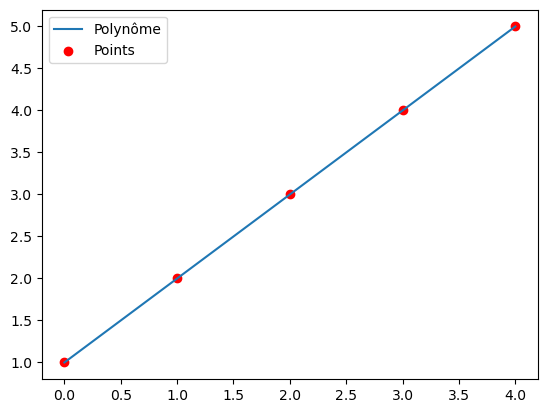

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Construire la matrice
x = np.array([0, 1, 2, 3, 4])
X = np.vander(x, increasing=True)

# 2. Résoudre le système linéaire (en utilisant numpy.linalg.solve)
b = np.array([1, 2, 3, 4, 5])
coefficients = np.linalg.solve(X, b)

# 3. Fonction poly
def poly(x, coeff):
    return np.polyval(coeff[::-1], x)

# 4. Tracer le polynôme et afficher les points
x_plot = np.linspace(0, 4, 100)
y_plot = poly(x_plot, coefficients)

plt.plot(x_plot, y_plot, label="Polynôme")
plt.scatter(x, b, color='red', label="Points")
plt.legend()
plt.show()


### Ex. 3: Utilisation de `vander` et `polyval`


In [3]:
# 1. Utilisation de `vander`
V = np.vander(x, increasing=True)

# 2. Utilisation de `polyval`
polynomial_values = np.polyval(coefficients[::-1], x)
polynomial_values


array([1., 2., 3., 4., 5.])

### Ex. 4: Moyenne mobile


In [4]:
# 1. Moyenne mobile
def moving_average(arr, window=3):
    return np.convolve(arr, np.ones(window)/window, mode='valid')

data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
ma = moving_average(data)
ma


array([2., 3., 4., 5., 6., 7.])

### Ex. 5: Manipulations de matrices


In [5]:
# 1. Supprimer la première colonne de M2
M3 = M2[:, 1:]

# 2. Construire la matrice B
B = np.hstack((M3, np.array([[10], [11], [12]])))
B


array([[ 2,  3, 10],
       [ 5,  6, 11],
       [ 8,  9, 12]])

### Ex. 6: Méthode des moindres carrés avec `scipy.linalg.lstsq`


In [9]:
import scipy.linalg as sl
import numpy as np

x = np.array([0, 1, 2, 3, 4]) 
b = np.array([1, 2, 3, 4, 5])


M2 = np.arange(1, 10).reshape(3, 3)
M3 = M2[:, 1:]  


M3 = np.vstack([M3, np.zeros((2, 2))])  
solution, _, _, _ = sl.lstsq(M3, b)

solution


array([3.37059728e-16, 3.33333333e-01])

### Ex. 7: Matrices de projection


In [7]:
# 1. Matrices de projection
v = np.array([1, 1])
P1 = np.outer(v, v) / np.dot(v, v)
P2 = np.eye(2) - P1

# 2. Vérification des vecteurs propres
np.dot(P1, v), np.dot(P2, v)


(array([1., 1.]), array([0., 0.]))

### Ex. 8: Matrice avec facteur de croissance extrême


In [8]:
# 1. Construire la matrice
n = 10  # Exemple avec n = 10
A = np.fromfunction(lambda i, j: 1 / (i + j + 1), (n, n))

# 2. Décomposition LU
P, L, U = sl.lu(A)
P, L, U


(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.33333333,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.125     ,  0.58333333,  1.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.5       ,  1.        , -0.85714286,  1.